<a href="https://colab.research.google.com/github/dvy246/pytorch/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset,DataLoader

In [6]:
torch.manual_seed(42)

In [7]:
df=pd.read_csv('fmnist_small.csv')
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1,0,0,0,0,0,0,0,0,0,...,69,12,0,0,0,0,0,0,0,0
5996,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5997,8,0,0,0,0,0,0,0,0,0,...,39,47,2,0,0,29,0,0,0,0
5998,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df['label'].value_counts()

,count
label,
6,656
7,620
5,612
2,604
4,595
0,595
3,591
1,590
8,582


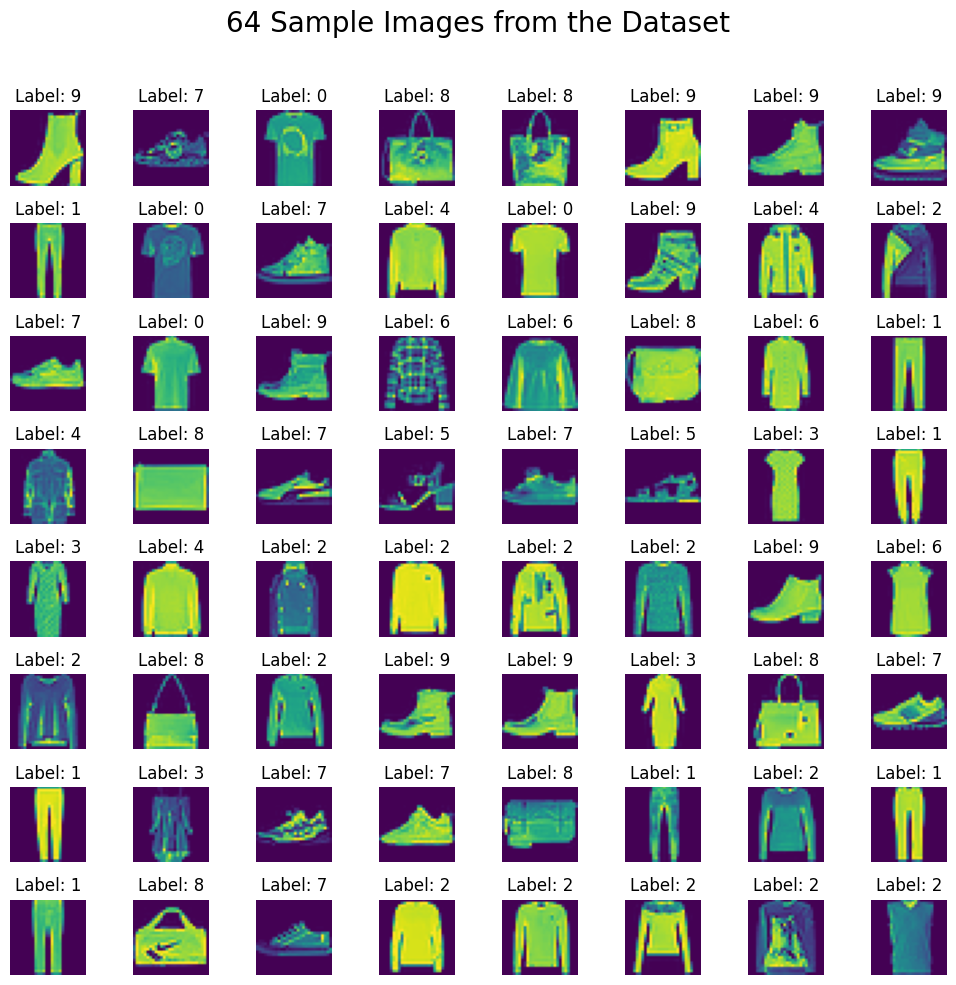

In [9]:
# Create an 8x8 grid of subplots for displaying images
fig, axes = plt.subplots(8, 8, figsize=(10, 10))

# Set a dynamic super title for the entire figure
# It displays the number of images plotted, which is 64 (8*8)
num_images = 8 * 8
plt.suptitle(f'{num_images} Sample Images from the Dataset', size=20)

# Loop through each subplot in the grid and display an image
for i, ax in enumerate(axes.flat):
    # Extract image data (pixels) from the DataFrame, skipping the label column
    # Reshape the 1D pixel array into a 28x28 image for display
    image = df.iloc[i, 1:].values.reshape(28, 28)

    # Display the image in the current subplot
    ax.imshow(image)

    # Remove the axis ticks and labels for a cleaner visual
    ax.axis('off')

    # Set the title of each subplot to show the corresponding image's label
    ax.set_title(f'Label: {df.iloc[i, 0]}')

# Adjust subplot parameters for a tight layout, ensuring elements do not overlap
# The rect parameter leaves space for the suptitle
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjusted rect to accommodate suptitle

# Display the plot
plt.show()

In [10]:
df.shape

(6000, 785)

In [11]:
#define your x and y

X=df.iloc[:,1:]
y=df.iloc[:,0]

In [12]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,0,0,0,0,0,0,0,0,1,...,69,12,0,0,0,0,0,0,0,0
5996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5997,0,0,0,0,0,0,0,0,0,0,...,39,47,2,0,0,29,0,0,0,0
5998,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [13]:
y

,label
0,9
1,7
2,0
3,8
4,8
...,...
5995,1
5996,5
5997,8
5998,4


In [14]:
#doing train and test split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [15]:
#scaling
X_train=X_train/255.0
X_test=X_test/255.0

In [16]:
#making dataset and dataset loader

class CustomDatest(Dataset):

  def __init__(self,features,labels):

    self.features=torch.tensor(features.to_numpy(),dtype=torch.float32)
    self.labels=torch.tensor(labels.to_numpy() ,dtype=torch.long)


  def __len__(self):

    return len(self.features)

  def __getitem__(self,indx):

    return self.features[indx],self.labels[indx]


In [17]:
dataset=CustomDatest(X_train,y_train)

In [18]:
dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.2078, 0.7686, 0.7294, 0.7843, 0.7725, 0.7765, 0.7804, 0.7961,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.4235, 0.9059, 0.7608, 0.7451, 0.8078, 0.8196, 0.7725,
         0.9647, 0.2078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.5529, 0.7922, 0.7255, 0.7804, 0.7843, 0.8000,
         0.7569, 0.9059, 0.4745, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.5961, 0.8118, 0.7451, 0.8078, 0.7961,
         0.8196, 0.7922, 0.8863, 0.6039, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [19]:
X_train.shape[1]

784

In [20]:
test=CustomDatest(X_test,y_test)

In [21]:
training_data_load=DataLoader(dataset=dataset,shuffle=True,batch_size=32)
test_data_load=DataLoader(dataset=test,shuffle=False,batch_size=32)

In [55]:
from torch.nn.modules.activation import ReLU

class MyNN(nn.Module):

  def __init__(self,num_features):

    super().__init__()

    self.Model=nn.Sequential(
        nn.Linear(num_features,128),
        nn.ReLU(),
        nn.Linear(128,80),
        nn.ReLU(),
        nn.Linear(80,60),
        nn.ReLU(),
        nn.Linear(60,20),
        nn.ReLU(),
        nn.Linear(20,10)

    )

  def forward(self,features):

    output=self.Model(features)
    return output


In [56]:
#define the model
model=MyNN(X_train.shape[1])

#learning rate and epochs
lr=0.1
epochs=68

#loss
Loss=nn.CrossEntropyLoss()

#optimizer
optimizer=optim.SGD(params=model.parameters(),lr=lr)

In [57]:
for epocs in range(epochs):

  total_epoch_loss=0

  for batch_features,batch_labels in training_data_load:

                  #Forward_prop
                  output=model(batch_features)

                  #loss_calculation
                  loss=Loss(output,batch_labels)

                  #zero_grad
                  optimizer.zero_grad()

                  #backward_prop
                  loss.backward()

                  #optimization
                  optimizer.step()

                  total_epoch_loss+=loss.item()


  avg_loss=total_epoch_loss/len(training_data_load)

  print(f'epoch {epocs+1} and the avg loss {avg_loss:.2f}')

epoch 1 and the avg loss 1.98
epoch 2 and the avg loss 1.21
epoch 3 and the avg loss 0.94
epoch 4 and the avg loss 0.80
epoch 5 and the avg loss 0.71
epoch 6 and the avg loss 0.64
epoch 7 and the avg loss 0.62
epoch 8 and the avg loss 0.58
epoch 9 and the avg loss 0.56
epoch 10 and the avg loss 0.51
epoch 11 and the avg loss 0.54
epoch 12 and the avg loss 0.47
epoch 13 and the avg loss 0.46
epoch 14 and the avg loss 0.43
epoch 15 and the avg loss 0.41
epoch 16 and the avg loss 0.40
epoch 17 and the avg loss 0.38
epoch 18 and the avg loss 0.37
epoch 19 and the avg loss 0.36
epoch 20 and the avg loss 0.35
epoch 21 and the avg loss 0.37
epoch 22 and the avg loss 0.33
epoch 23 and the avg loss 0.34
epoch 24 and the avg loss 0.31
epoch 25 and the avg loss 0.29
epoch 26 and the avg loss 0.29
epoch 27 and the avg loss 0.30
epoch 28 and the avg loss 0.27
epoch 29 and the avg loss 0.26
epoch 30 and the avg loss 0.25
epoch 31 and the avg loss 0.26
epoch 32 and the avg loss 0.25
epoch 33 and the 

In [45]:
!pip install torchinfo

In [46]:
import torchinfo

In [47]:
torchinfo.summary(model=model,input_size=(1,X_train.shape[1]))

Layer (type:depth-idx)                   Output Shape              Param #
MyNN                                     [1, 10]                   --
├─Sequential: 1-1                        [1, 10]                   --
│    └─Linear: 2-1                       [1, 128]                  100,480
│    └─ReLU: 2-2                         [1, 128]                  --
│    └─Linear: 2-3                       [1, 80]                   10,320
│    └─ReLU: 2-4                         [1, 80]                   --
│    └─Linear: 2-5                       [1, 50]                   4,050
│    └─ReLU: 2-6                         [1, 50]                   --
│    └─Linear: 2-7                       [1, 20]                   1,020
│    └─ReLU: 2-8                         [1, 20]                   --
│    └─Linear: 2-9                       [1, 10]                   210
Total params: 116,080
Trainable params: 116,080
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.12
Input size (MB): 0.00
Forwa

In [48]:
torch.save(model.state_dict(),'neural_network')

In [60]:
# Set the model to evaluation mode. This disables dropout and batch normalization layers
# if they are present in the model, as these behave differently during training and evaluation.
model.eval()

# Initialize variables to keep track of the total number of samples and correctly predicted samples.
total = 0
correct = 0

# Disable gradient calculations for evaluation. This is important because we don't need
# to compute gradients during inference, which saves memory and speeds up computations.
with torch.no_grad():
  # Iterate through the test data using the DataLoader, which provides batches of features and labels.
  for batch_features, batch_lables in test_data_load:

    # Perform a forward pass to get raw model outputs (logits) for the current batch.
    y_prediction = model(batch_features)

    # Get the predicted class by finding the index of the maximum value along dimension 1 (the class dimension).
    # torch.max returns both the maximum value and its index. We only need the index.
    _, prediction = torch.max(y_prediction, 1)

    # Update the total number of samples processed.
    total += batch_lables.shape[0] # batch_lables.shape[0] gives the number of samples in the current batch.

    # Count how many predictions in the current batch match the true labels.
    # (prediction == batch_lables) creates a boolean tensor, .sum() counts True values,
    # and .item() converts the single-element tensor to a Python number.
    correct += (prediction == batch_lables).sum().item()

# After iterating through all test data, calculate the overall accuracy.
# Accuracy is the ratio of correctly predicted samples to the total number of samples.
print(correct / total)


0.8516666666666667
